In [1]:
#!pip install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch --yes

In [2]:
import sys
print(sys.executable)

/usr/bin/python3


In [42]:
from PIL import Image
import os
import math
import functools
import json
import copy
from numpy.random import randint
import numpy as np
import random

In [43]:
root_path = "/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg"
annotation_path = "/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/ntu_01.json"
video_path = "3D-ResNets-PyTorch/data/jpg"
sample_duration = 16
subset = 'training'

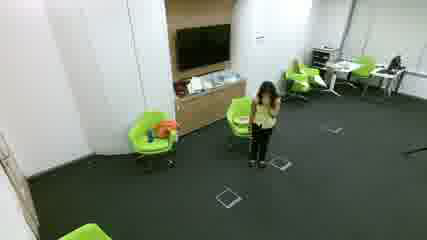

In [53]:
im = Image.open("/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg/sneezeCough/S017C003P017R001A041_rgb/image_00040.jpg")
im.show()

In [54]:
width, height = im.size

In [55]:
print(width, height)

427 240


In [6]:
def load_annotation_data(data_file_path):
    with open(data_file_path, 'r') as data_file:
        return json.load(data_file)

In [7]:
def get_video_names_and_annotations(data, subset):
    video_names = []
    annotations = []

    for key, value in data['database'].items():
        this_subset = value['subset']
        if this_subset == subset:
            label = value['annotations']['label']
            video_names.append('{}/{}'.format(label, key))
            annotations.append(value['annotations'])

    return video_names, annotations

In [8]:
def get_class_labels(data):
    class_labels_map = {}
    index = 0
    for class_label in data['labels']:
        class_labels_map[class_label] = index
        index += 1
    return class_labels_map

In [9]:
def load_value_file(file_path):
    with open(file_path, 'r') as input_file:
        value = float(input_file.read().rstrip('\n\r'))

    return value

In [10]:
def make_dataset(root_path, annotation_path, subset, n_samples_for_each_video,
                 sample_duration):
    data = load_annotation_data(annotation_path)
    video_names, annotations = get_video_names_and_annotations(data, subset)
    print(video_names[0],annotations[0])
    class_to_idx = get_class_labels(data)
    print(class_to_idx)

    idx_to_class = {}
    for name, label in class_to_idx.items():
        idx_to_class[label] = name

    dataset = []
    for i in range(len(video_names)):
        if i % 1000 == 0:
            print('dataset loading [{}/{}]'.format(i, len(video_names)))

        video_path = os.path.join(root_path,video_names[i])
        if not os.path.exists(video_path):
            print("video path does not exist"+video_path)

        n_frames_file_path = os.path.join(video_path, 'n_frames')
        n_frames = int(load_value_file(n_frames_file_path))
        if n_frames <= 0:
            print("cant find no of frames")

        begin_t = 1
        end_t = n_frames
        sample = {
            'video': video_path,
            'segment': [begin_t, end_t],
            'n_frames': n_frames,
            'video_id': video_names[i].split('/')[1]
        }
        if len(annotations) != 0:
            sample['label'] = class_to_idx[annotations[i]['label']]
        else:
            sample['label'] = -1

        if n_samples_for_each_video == 1:
            sample['frame_indices'] = list(range(1, n_frames + 1))
            dataset.append(sample)
        else:
            if n_samples_for_each_video > 1:
                step = max(1,
                           math.ceil((n_frames - 1 - sample_duration) /
                                     (n_samples_for_each_video - 1)))
            else:
                step = sample_duration
            for j in range(1, n_frames, step):
                sample_j = copy.deepcopy(sample)
                sample_j['frame_indices'] = list(
                    range(j, min(n_frames + 1, j + sample_duration)))
                dataset.append(sample_j)

    return dataset, idx_to_class

In [11]:
data, class_names = make_dataset(root_path, annotation_path, subset, 1, sample_duration)

sneezeCough/S010C003P019R002A041_rgb {'label': 'sneezeCough', 'segment': [1, 93]}
{'sneezeCough': 0, 'staggering': 1, 'fallingDown': 2, 'headache': 3, 'chestPain': 4, 'backPain': 5, 'neckPain': 6, 'nauseaVomiting': 7, 'fanSelf': 8}
dataset loading [0/6825]
dataset loading [1000/6825]
dataset loading [2000/6825]
dataset loading [3000/6825]
dataset loading [4000/6825]
dataset loading [5000/6825]
dataset loading [6000/6825]


In [12]:
print(class_names)

{0: 'sneezeCough', 1: 'staggering', 2: 'fallingDown', 3: 'headache', 4: 'chestPain', 5: 'backPain', 6: 'neckPain', 7: 'nauseaVomiting', 8: 'fanSelf'}


In [13]:
print(data[-1])

{'video': '/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg/fanSelf/S012C003P025R001A049_rgb', 'segment': [1, 169], 'n_frames': 169, 'video_id': 'S012C003P025R001A049_rgb', 'label': 8, 'frame_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]}


In [14]:
class TemporalRandomCrop(object):
    """Temporally crop the given frame indices at a random location.
    If the number of frames is less than the size,
    loop the indices as many times as necessary to satisfy the size.
    Args:
        size (int): Desired output size of the crop.
    """

    def __init__(self, size, downsample):
        self.size = size
        self.downsample = downsample

    def __call__(self, frame_indices):
        """
        Args:
            frame_indices (list): frame indices to be cropped.
        Returns:
            list: Cropped frame indices.
        """

        vid_duration  = len(frame_indices)
        clip_duration = self.size * self.downsample

        rand_end = max(0, vid_duration - clip_duration - 1)
        begin_index = random.randint(0, rand_end)
        end_index = min(begin_index + clip_duration, vid_duration)

        out = frame_indices[begin_index:end_index]

        for index in out:
            if len(out) >= clip_duration:
                break
            out.append(index)

        selected_frames = [out[i] for i in range(0, clip_duration, self.downsample)]

        return selected_frames

In [15]:
class TemporalCenterCrop(object):
    """Temporally crop the given frame indices at a center.
    If the number of frames is less than the size,
    loop the indices as many times as necessary to satisfy the size.
    Args:
        size (int): Desired output size of the crop.
    """

    def __init__(self, size, downsample):
        self.size = size
        self.downsample = downsample

    def __call__(self, frame_indices):
        """
        Args:
            frame_indices (list): frame indices to be cropped.
        Returns:
            list: Cropped frame indices.
        """
        vid_duration  = len(frame_indices)
        clip_duration = self.size * self.downsample

        center_index = vid_duration // 2
        begin_index = max(8, (center_index) - (clip_duration // 2))
        end_index = min(begin_index + clip_duration, vid_duration)

        out = frame_indices[begin_index:end_index]

        for index in out:
            if len(out) >= clip_duration:
                break
            out.append(index)

        selected_frames = [out[i] for i in range(0, clip_duration, self.downsample)]

        return selected_frames

In [16]:
class ClassLabel(object):

    def __call__(self, target):
        return target['label']

In [17]:
class ToTensor(object):
    """Convert a ``PIL.Image`` or ``numpy.ndarray`` to tensor.
    Converts a PIL.Image or numpy.ndarray (H x W x C) in the range
    [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
    """

    def __init__(self, norm_value=255):
        self.norm_value = norm_value

    def __call__(self, pic):
        """
        Args:
            pic (PIL.Image or numpy.ndarray): Image to be converted to tensor.
        Returns:
            Tensor: Converted image.
        """
        if isinstance(pic, np.ndarray):
            # handle numpy array
            img = torch.from_numpy(pic.transpose((2, 0, 1)))
            # backward compatibility
            return img.float().div(self.norm_value)

        # handle PIL Image
        if pic.mode == 'I':
            img = torch.from_numpy(np.array(pic, np.int32, copy=False))
        elif pic.mode == 'I;16':
            img = torch.from_numpy(np.array(pic, np.int16, copy=False))
        else:
            img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
        # PIL image mode: 1, L, P, I, F, RGB, YCbCr, RGBA, CMYK
        if pic.mode == 'YCbCr':
            nchannel = 3
        elif pic.mode == 'I;16':
            nchannel = 1
        else:
            nchannel = len(pic.mode)
        img = img.view(pic.size[1], pic.size[0], nchannel)
        # put it from HWC to CHW format
        # yikes, this transpose takes 80% of the loading time/CPU
        img = img.transpose(0, 1).transpose(0, 2).contiguous()
        if isinstance(img, torch.ByteTensor):
            return img.float().div(self.norm_value)
        else:
            return img

    def randomize_parameters(self):
        pass

In [18]:
class RandomHorizontalFlip(object):
    """Horizontally flip the given PIL.Image randomly with a probability of 0.5."""

    def __call__(self, img):
        """
        Args:
            img (PIL.Image): Image to be flipped.
        Returns:
            PIL.Image: Randomly flipped image.
        """
        if self.p < 0.5:
            return img.transpose(Image.FLIP_LEFT_RIGHT)
        return img

    def randomize_parameters(self):
        self.p = random.random()

In [19]:
class MultiScaleRandomCrop(object):

    def __init__(self, scales, size, interpolation=Image.BILINEAR):
        self.scales = scales
        self.size = size
        self.interpolation = interpolation

    def __call__(self, img):
        min_length = min(img.size[0], img.size[1])
        crop_size = int(min_length * self.scale)

        image_width = img.size[0]
        image_height = img.size[1]

        x1 = self.tl_x * (image_width - crop_size)
        y1 = self.tl_y * (image_height - crop_size)
        x2 = x1 + crop_size
        y2 = y1 + crop_size

        img = img.crop((x1, y1, x2, y2))

        return img.resize((self.size, self.size), self.interpolation)

    def randomize_parameters(self):
        self.scale = self.scales[random.randint(0, len(self.scales) - 1)]
        #self.scale = 1
        self.tl_x = random.random()
        self.tl_y = random.random()

In [20]:
class MultiScaleCornerCrop(object):
    """Crop the given PIL.Image to randomly selected size.
    A crop of size is selected from scales of the original size.
    A position of cropping is randomly selected from 4 corners and 1 center.
    This crop is finally resized to given size.
    Args:
        scales: cropping scales of the original size
        size: size of the smaller edge
        interpolation: Default: PIL.Image.BILINEAR
    """

    def __init__(self,
                 scales,
                 size,
                 interpolation=Image.BILINEAR,
                 crop_positions=['c', 'tl', 'tr', 'bl', 'br']):
        self.scales = scales
        self.size = size
        self.interpolation = interpolation

        self.crop_positions = crop_positions

    def __call__(self, img):
        min_length = min(img.size[0], img.size[1])
        print(img.size[0], img.size[1])
        crop_size = int(min_length * self.scale)
        print(crop_size)
        image_width = img.size[0]
        image_height = img.size[1]

        if self.crop_position == 'c':
            center_x = image_width // 2
            center_y = image_height // 2
            box_half = crop_size // 2
            x1 = center_x - box_half
            y1 = center_y - box_half
            x2 = center_x + box_half
            y2 = center_y + box_half
        elif self.crop_position == 'tl':
            x1 = 0
            y1 = 0
            x2 = crop_size
            y2 = crop_size
        elif self.crop_position == 'tr':
            x1 = image_width - crop_size
            y1 = 0
            x2 = image_width
            y2 = crop_size
        elif self.crop_position == 'bl':
            x1 = 0
            y1 = image_height - crop_size
            x2 = crop_size
            y2 = image_height
        elif self.crop_position == 'br':
            x1 = image_width - crop_size
            y1 = image_height - crop_size
            x2 = image_width
            y2 = image_height

        img = img.crop((x1, y1, x2, y2))
        img.show()
        img.resize((self.size, self.size), self.interpolation).show()
        return img.resize((self.size, self.size), self.interpolation)

    def randomize_parameters(self):
        print(self.scales)
        self.scale = self.scales[random.randint(0, len(self.scales) - 1)]
        print("scale"+ str(self.scale))
        self.crop_position = 'c'


In [21]:
def video_loader(video_dir_path, frame_indices):
    video = []
    for i in frame_indices:
        image_path = os.path.join(video_dir_path, 'image_{:05d}.jpg'.format(i))
        if os.path.exists(image_path):
            video.append(pil_loader(image_path))
        else:
            return video

    return video

In [22]:
def get_default_video_loader(path, frame_indices):
    return video_loader(path, frame_indices)

In [23]:
def get_default_image_loader():
    from torchvision import get_image_backend
    if get_image_backend() == 'accimage':
        return accimage_loader
    else:
        return pil_loader

In [24]:
def pil_loader(path):
    # open path as file to avoid ResourceWarning (https://github.com/python-pillow/Pillow/issues/835)
    with open(path, 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

In [25]:
class Compose(object):
    """Composes several transforms together.
    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.
    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

    def randomize_parameters(self):
        for t in self.transforms:
            t.randomize_parameters()

In [26]:
path = data[0]['video']

In [27]:
frame_indices = data[0]['frame_indices']


In [28]:
scales = [1.0]
for i in range(1, 5):
    scales.append(scales[-1] * 0.97)

In [29]:
scales

[1.0, 0.97, 0.9409, 0.912673, 0.8852928099999999]

In [30]:
def display_image(path):
    im = Image.open(path)
    im.show()

In [31]:
def UCF101_getdata(data, index, spatial_transform, temporal_transform, target_transform):
    path = data[index]['video']
    frame_indices = data[index]['frame_indices']
    if temporal_transform is not None:
        frame_indices = temporal_transform(frame_indices)
    print(frame_indices)
#     frame_path_first = path+"/"+"image_000"+str(frame_indices[0])+".jpg"
#     print(frame_path_first)
#     frame_path_last = path+"/"+"image_000"+str(frame_indices[-1])+".jpg"
#     print(frame_path_last)
#     display_image(frame_path_first)
#     display_image(frame_path_last)

    clip = get_default_video_loader(path, frame_indices)
    for img in clip :
        img.show()
    if spatial_transform is not None:
        spatial_transform.randomize_parameters()
        clip = [spatial_transform(img) for img in clip]
    for img in clip :
        img.show()
#     clip = torch.stack(clip, 0).permute(1, 0, 2, 3)

    target = data[index]
    print(target)
    if target_transform is not None:
        target = target_transform(target)
    print(target)
    return clip, target

In [32]:
def train_data(train_crop, sample_duration, downsample, sample_size, scales):
    if train_crop == 'random':
        crop_method = MultiScaleRandomCrop(scales, sample_size)
    elif train_crop == 'corner':
        crop_method = MultiScaleCornerCrop(scales, sample_size)
    elif train_crop == 'center':
        crop_method = MultiScaleCornerCrop(
            scales, sample_size, crop_positions=['c'])
    spatial_transform = Compose([
        RandomHorizontalFlip(),
        #RandomRotate(),
        #RandomResize(),
        crop_method,
        #MultiplyValues(),
        #Dropout(),
        #SaltImage(),
        #Gaussian_blur(),
        #SpatialElasticDisplacement(),
        #ToTensor(1)
    ])
    temporal_transform = TemporalCenterCrop(sample_duration, downsample)
    target_transform = ClassLabel()
    training_data = UCF101_getdata(data, 4, spatial_transform, temporal_transform, target_transform)

[26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56]


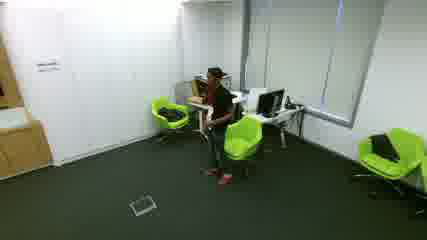

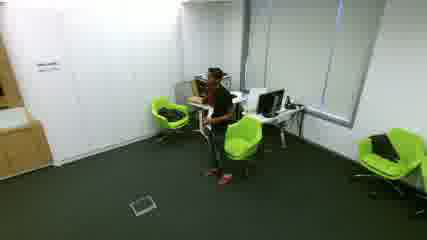

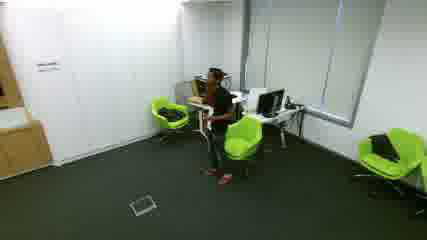

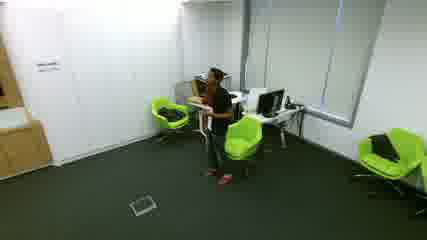

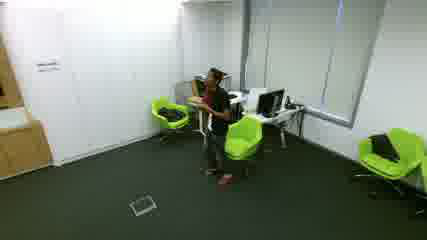

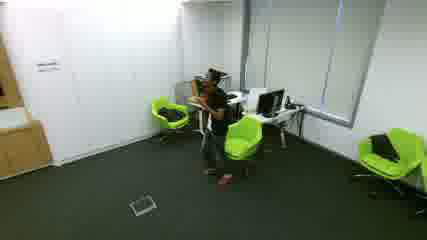

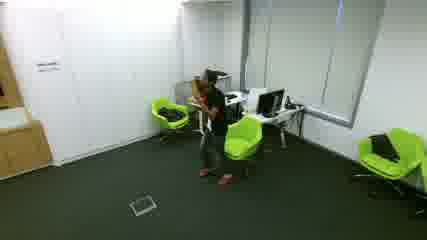

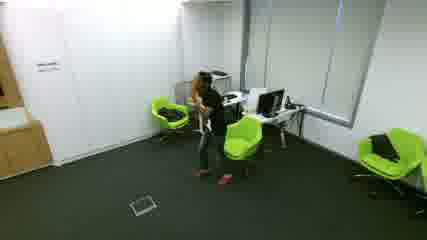

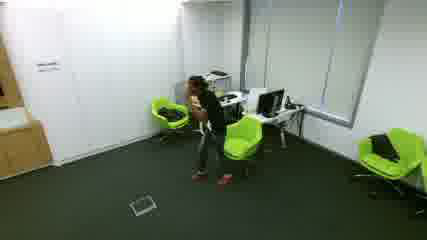

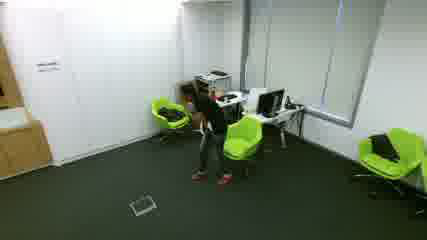

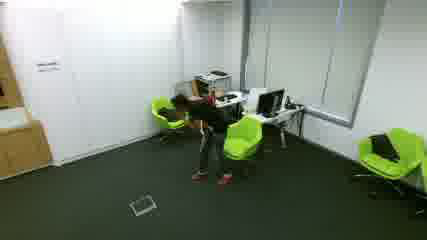

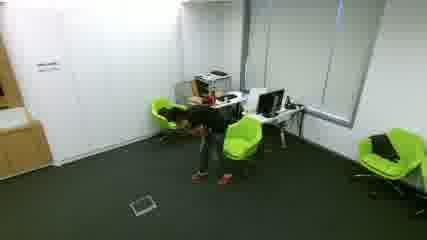

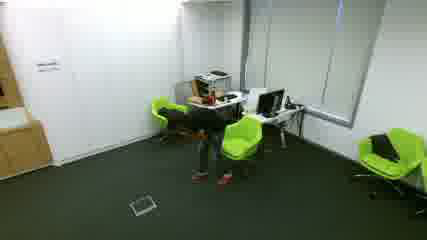

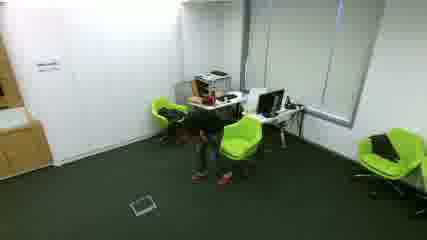

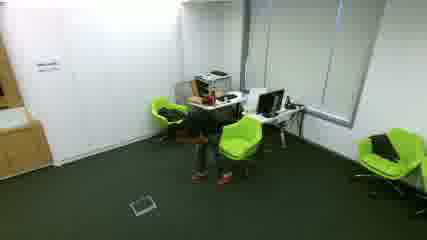

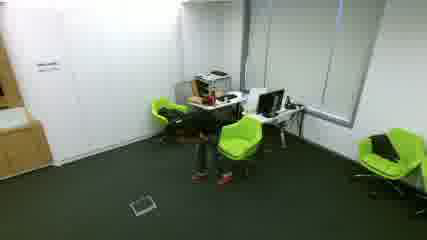

[1.0, 0.97, 0.9409, 0.912673, 0.8852928099999999]
scale0.8852928099999999
427 240
212


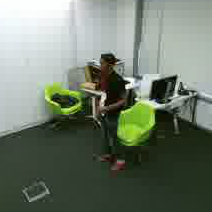

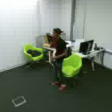

427 240
212


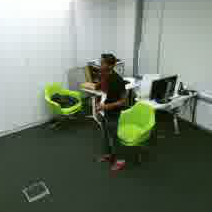

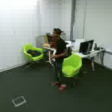

427 240
212


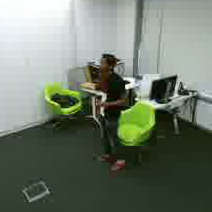

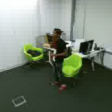

427 240
212


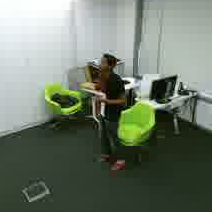

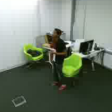

427 240
212


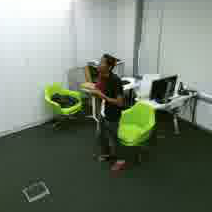

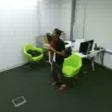

427 240
212


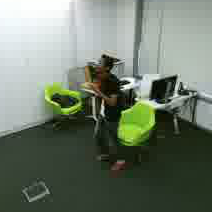

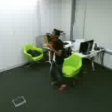

427 240
212


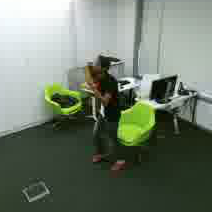

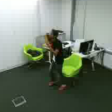

427 240
212


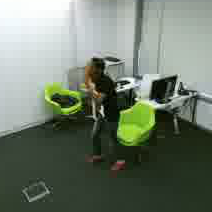

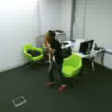

427 240
212


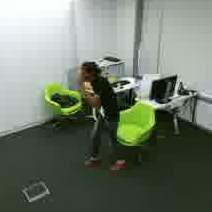

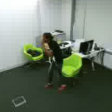

427 240
212


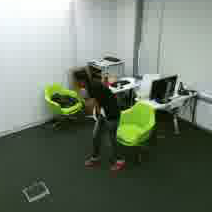

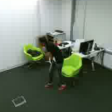

427 240
212


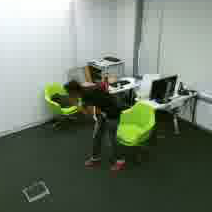

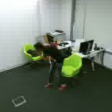

427 240
212


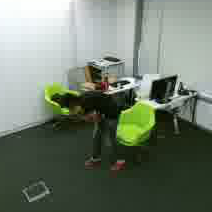

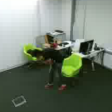

427 240
212


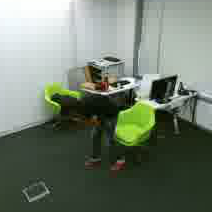

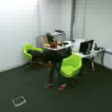

427 240
212


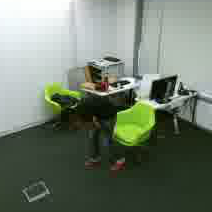

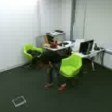

427 240
212


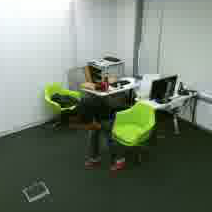

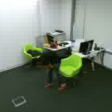

427 240
212


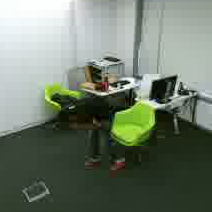

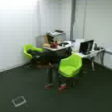

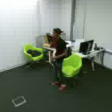

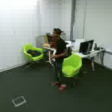

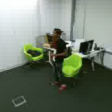

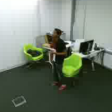

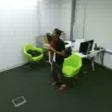

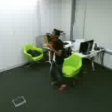

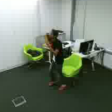

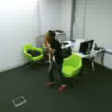

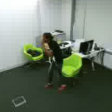

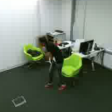

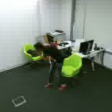

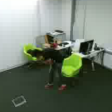

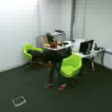

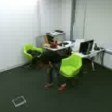

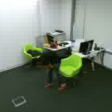

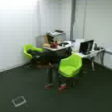

{'video': '/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg/sneezeCough/S015C001P025R001A041_rgb', 'segment': [1, 83], 'n_frames': 83, 'video_id': 'S015C001P025R001A041_rgb', 'label': 0, 'frame_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]}
0


In [33]:
train_data('center', 16, 2, 112, scales)

In [34]:
import random
import math
import numbers
import collections
import numpy as np
import cv2
import scipy.ndimage

In [35]:
val, class_names = make_dataset(root_path, annotation_path, 'validation', 0, sample_duration)

sneezeCough/S014C001P019R001A041_rgb {'label': 'sneezeCough', 'segment': [1, 61]}
{'sneezeCough': 0, 'staggering': 1, 'fallingDown': 2, 'headache': 3, 'chestPain': 4, 'backPain': 5, 'neckPain': 6, 'nauseaVomiting': 7, 'fanSelf': 8}
dataset loading [0/1707]
dataset loading [1000/1707]


In [36]:
val

[{'video': '/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg/sneezeCough/S014C001P019R001A041_rgb',
  'segment': [1, 60],
  'n_frames': 60,
  'video_id': 'S014C001P019R001A041_rgb',
  'label': 0,
  'frame_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]},
 {'video': '/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg/sneezeCough/S014C001P019R001A041_rgb',
  'segment': [1, 60],
  'n_frames': 60,
  'video_id': 'S014C001P019R001A041_rgb',
  'label': 0,
  'frame_indices': [17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32]},
 {'video': '/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg/sneezeCough/S014C001P019R001A041_rgb',
  'segment': [1, 60],
  'n_frames': 60,
  'video_id': 'S014C001P019R001A041_rgb',
  'label': 0,
  'frame_indices': [33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48]},
 {'video': '/home/shared/workspace/Resne

In [37]:
class Scale(object):
    """Rescale the input PIL.Image to the given size.
    Args:
        size (sequence or int): Desired output size. If size is a sequence like
            (w, h), output size will be matched to this. If size is an int,
            smaller edge of the image will be matched to this number.
            i.e, if height > width, then image will be rescaled to
            (size * height / width, size)
        interpolation (int, optional): Desired interpolation. Default is
            ``PIL.Image.BILINEAR``
    """

    def __init__(self, size, interpolation=Image.BILINEAR):
        assert isinstance(size,
                          int) or (isinstance(size, collections.Iterable) and
                                   len(size) == 2)
        self.size = size
        self.interpolation = interpolation

    def __call__(self, img):
        """
        Args:
            img (PIL.Image): Image to be scaled.
        Returns:
            PIL.Image: Rescaled image.
        """
        if isinstance(self.size, int):
            w, h = img.size
            if (w <= h and w == self.size) or (h <= w and h == self.size):
                return img
            if w < h:
                ow = self.size
                oh = int(self.size * h / w)
                return img.resize((ow, oh), self.interpolation)
            else:
                oh = self.size
                ow = int(self.size * w / h)
                return img.resize((ow, oh), self.interpolation)
        else:
            return img.resize(self.size, self.interpolation)

    def randomize_parameters(self):
        pass

In [38]:
class CenterCrop(object):
    """Crops the given PIL.Image at the center.
    Args:
        size (sequence or int): Desired output size of the crop. If size is an
            int instead of sequence like (h, w), a square crop (size, size) is
            made.
    """

    def __init__(self, size):
        if isinstance(size, numbers.Number):
            self.size = (int(size), int(size))
        else:
            self.size = size

    def __call__(self, img):
        """
        Args:
            img (PIL.Image): Image to be cropped.
        Returns:
            PIL.Image: Cropped image.
        """
        w, h = img.size
        th, tw = self.size
        x1 = int(round((w - tw) / 2.))
        y1 = int(round((h - th) / 2.))
        return img.crop((x1, y1, x1 + tw, y1 + th))

    def randomize_parameters(self):
        pass

In [39]:
class VideoID(object):

    def __call__(self, target):
        return target['video_id']

In [40]:
def test_data(sample_duration, downsample, sample_size):
    spatial_transform = Compose([
        Scale(int(sample_size / 1.0)),
        CenterCrop(sample_size),
#         ToTensor(opt.norm_value), norm_method
    ])
    # temporal_transform = LoopPadding(opt.sample_duration, opt.downsample)
    temporal_transform = TemporalCenterCrop(sample_duration, downsample)
    target_transform = VideoID()
    training_data = UCF101_getdata(val, 0, spatial_transform, temporal_transform, target_transform)

[9, 11, 13, 15, 9, 11, 13, 15]


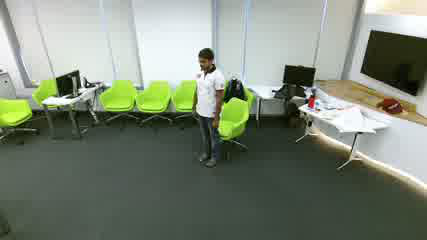

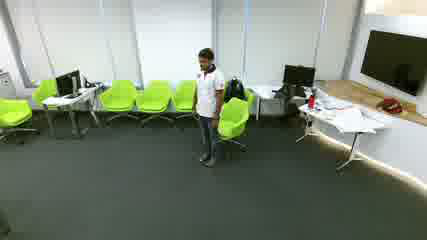

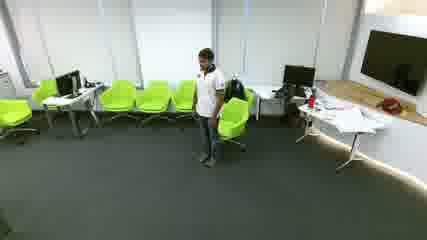

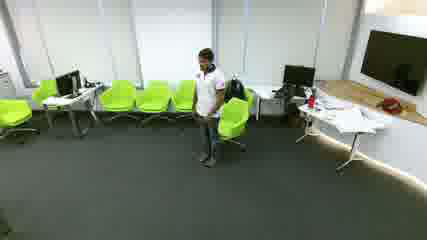

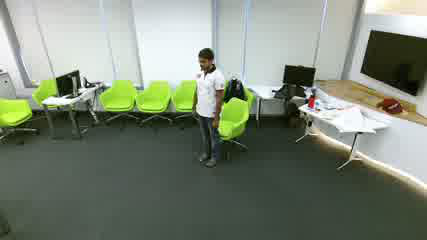

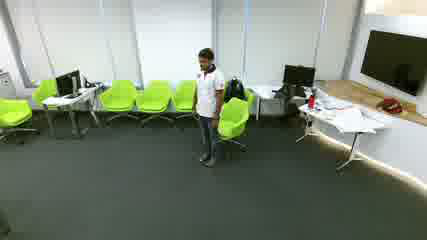

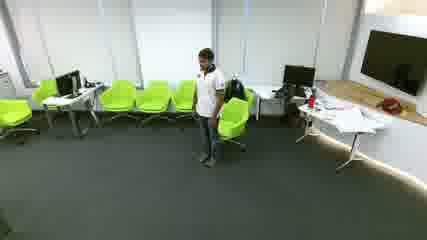

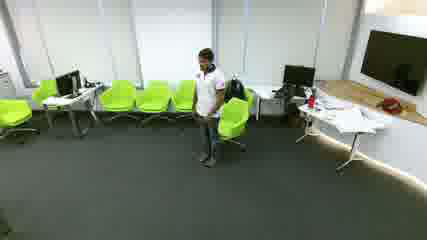

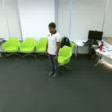

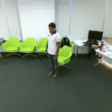

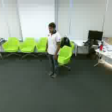

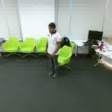

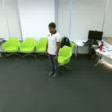

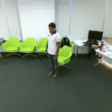

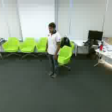

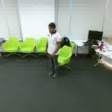

{'video': '/home/shared/workspace/Resnet3D/3D-ResNets-PyTorch/data/jpg/sneezeCough/S014C001P019R001A041_rgb', 'segment': [1, 60], 'n_frames': 60, 'video_id': 'S014C001P019R001A041_rgb', 'label': 0, 'frame_indices': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}
S014C001P019R001A041_rgb


In [41]:
test_data(8, 2, 112)